# L3 Action:汽车消费城市划分
数据集：car_data.csv <br>
31个省份地区，4个维度的指标（人均GDP，城镇人口比重，交通工具消费价格指数，百户拥有汽车量） <br>
Thinking：将城市划分为几组，哪些城市会是在一组？ <br>

In [15]:
#导入模块
from sklearn.cluster import KMeans#KMeans
from sklearn import preprocessing#KMeans中预处理模块
import pandas as pd
#数据加载
data = pd.read_csv('car_data.csv',encoding='gbk')#数据中含中文，注意emcoding格式
data


,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,北京,8.05,86.20,95.92,37.71
1,天津,8.34,80.50,103.57,20.62
2,河北,3.39,45.60,99.03,23.32
3,山西,3.13,49.68,98.96,18.60
4,内蒙古,5.79,56.62,99.11,19.62
5,辽宁,5.07,64.05,100.12,11.15
6,吉林,3.84,53.40,97.15,11.24
7,黑龙江,3.28,56.50,100.54,5.29
8,上海,8.18,89.30,101.58,18.15
9,江苏,6.22,61.90,98.95,23.92


In [16]:
train_x=data[['人均GDP','城镇人口比重','交通工具消费价格指数', '百户拥有汽车量']]

# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()# .MinMaxScaler()：x = (x-min)/(max-min)
train_x=min_max_scaler.fit_transform(train_x)#将训练集数据统一归一化处理
train_x

array([[0.95671642, 0.95344646, 0.        , 1.        ],
       [1.        , 0.86784803, 1.        , 0.47285626],
       [0.26119403, 0.34374531, 0.40653595, 0.55613819],
       [0.22238806, 0.40501577, 0.39738562, 0.41054904],
       [0.61940299, 0.50923562, 0.41699346, 0.4420111 ],
       [0.5119403 , 0.62081394, 0.54901961, 0.18075262],
       [0.32835821, 0.46088001, 0.16078431, 0.18352869],
       [0.24477612, 0.50743355, 0.60392157, 0.        ],
       [0.9761194 , 1.        , 0.73986928, 0.39666872],
       [0.68358209, 0.58852681, 0.39607843, 0.57464528],
       [0.63880597, 0.59453371, 0.10065359, 0.88093769],
       [0.13731343, 0.33173149, 0.56601307, 0.12060457],
       [0.45970149, 0.53146118, 0.63137255, 0.38679827],
       [0.14477612, 0.34524703, 0.65228758, 0.11073411],
       [0.45820896, 0.4240877 , 0.3372549 , 0.70419494],
       [0.18358209, 0.26820844, 0.61045752, 0.27051203],
       [0.2641791 , 0.4373029 , 0.68366013, 0.13571869],
       [0.2       , 0.33623667,

In [19]:
# 使用KMeans聚类
kmeans = KMeans(n_clusters=4#调用KMeans分类器
kmeans.fit(train_x)
predict_y1 = kmeans.predict(train_x)
predict_y1 

array([1, 3, 2, 2, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0])

In [20]:
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y1)),axis=1)
result.rename({0:u'KMeans聚类结果'},axis=1,inplace=True)
result

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,KMeans聚类结果
0,北京,8.05,86.20,95.92,37.71,1
1,天津,8.34,80.50,103.57,20.62,3
2,河北,3.39,45.60,99.03,23.32,2
3,山西,3.13,49.68,98.96,18.60,2
4,内蒙古,5.79,56.62,99.11,19.62,1
5,辽宁,5.07,64.05,100.12,11.15,0
6,吉林,3.84,53.40,97.15,11.24,0
7,黑龙江,3.28,56.50,100.54,5.29,0
8,上海,8.18,89.30,101.58,18.15,3
9,江苏,6.22,61.90,98.95,23.92,1


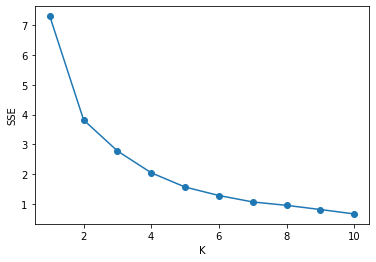

In [21]:
# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

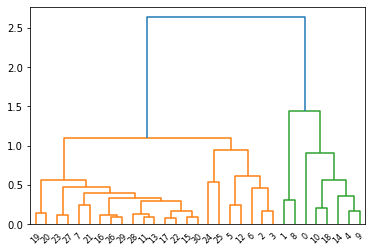

In [53]:
#使用层次聚类，层次为4
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
model = AgglomerativeClustering(linkage='ward', n_clusters=4)
predict_y2 = model.fit_predict(train_x)

linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()


In [66]:
#KMeans与分层据类结果对比
result_combine = pd.concat((data,pd.DataFrame(predict_y1,columns=['KMeans聚类结果']),pd.DataFrame(predict_y2,columns=['分层聚类结果'])),axis=1)
result_combine

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,KMeans聚类结果,分层聚类结果
0,北京,8.05,86.20,95.92,37.71,1,1
1,天津,8.34,80.50,103.57,20.62,3,2
2,河北,3.39,45.60,99.03,23.32,2,0
3,山西,3.13,49.68,98.96,18.60,2,0
4,内蒙古,5.79,56.62,99.11,19.62,1,1
5,辽宁,5.07,64.05,100.12,11.15,0,0
6,吉林,3.84,53.40,97.15,11.24,0,0
7,黑龙江,3.28,56.50,100.54,5.29,0,3
8,上海,8.18,89.30,101.58,18.15,3,2
9,江苏,6.22,61.90,98.95,23.92,1,1
